# Task 1. Descriptive Data Analysis

Use data from the **StudentPerformanceFactors.csv** file with student information.

[Source](https://www.kaggle.com/datasets/lainguyn123/student-performance-factors/code)

It contains the following variables:

| Variable name | Variable description
|:-------------------:|:------------------:|
| Hours_Studied | Number of hours spent studying per week |
| Attendance | Percentage of classes attended | 
| Parental_Involvement | Level of parental involvement in the student's education (Low, Medium, High)| 
| Access_to_Resources | Availability of educational resources (Low, Medium, High)| 
| Extracurricular_Activities | Participation in extracurricular activities (Yes, No).
| Sleep_Hours | Average number of hours of sleep per night.
| Previous_Scores |	Scores from previous exams.
| Motivation_Level |	Student's level of motivation (Low, Medium, High).
| Internet_Access |	Availability of internet access (Yes, No).
| Tutoring_Sessions |	Number of tutoring sessions attended per month.
| Family_Income |	Family income level (Low, Medium, High).
| Teacher_Quality |	Quality of the teachers (Low, Medium, High).
| School_Type |	Type of school attended (Public, Private).
| Peer_Influence |	Influence of peers on academic performance (Positive, Neutral, Negative).
| Physical_Activity |	Average number of hours of physical activity per week.
| Learning_Disabilities |	Presence of learning disabilities (Yes, No).
| Parental_Education_Level |	Highest education level of parents (High School, College, Postgraduate).
| Distance_from_Home |	Distance from home to school (Near, Moderate, Far).
| Gender |	Gender of the student (Male, Female).
| Exam_Score |	Final exam score.


Please complete the following tasks.

1. Describe the dataset (number of observations and variables, missing values, data types, variables’ measurement scale).

In [127]:
# you can write code here

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


df = pd.read_csv('StudentPerformanceFactors.csv')

# number of observations and variables, variables’ measurement scale
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [128]:
# describe quantitative data
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000,6607.000,6607.000,6607.000,6607.000,6607.000,6607.000
mean,19.975,79.977,7.029,75.071,1.494,2.968,67.236
std,5.991,11.547,1.468,14.400,1.231,1.031,3.890
min,1.000,60.000,4.000,50.000,0.000,0.000,55.000
25%,16.000,70.000,6.000,63.000,1.000,2.000,65.000
50%,20.000,80.000,7.000,75.000,1.000,3.000,67.000
75%,24.000,90.000,8.000,88.000,2.000,4.000,69.000
max,44.000,100.000,10.000,100.000,8.000,6.000,101.000


In [129]:
# describe categorical data

df.describe(include=['object', 'category'])

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814


In [130]:
df = df.dropna()

In [131]:

cats = df.select_dtypes(include=['object', 'category']).columns

for col in cats:
    vals = df[col].dropna().unique()         # уникальные значения (без NaN)
    print(col, "—", len(vals), "possible values")
    print(sorted(vals) if len(vals) <= 50 else list(vals[:50]))  # если много — показываем первые 50
    print()


Parental_Involvement — 3 possible values
['High', 'Low', 'Medium']

Access_to_Resources — 3 possible values
['High', 'Low', 'Medium']

Extracurricular_Activities — 2 possible values
['No', 'Yes']

Motivation_Level — 3 possible values
['High', 'Low', 'Medium']

Internet_Access — 2 possible values
['No', 'Yes']

Family_Income — 3 possible values
['High', 'Low', 'Medium']

Teacher_Quality — 3 possible values
['High', 'Low', 'Medium']

School_Type — 2 possible values
['Private', 'Public']

Peer_Influence — 3 possible values
['Negative', 'Neutral', 'Positive']

Learning_Disabilities — 2 possible values
['No', 'Yes']

Parental_Education_Level — 3 possible values
['College', 'High School', 'Postgraduate']

Distance_from_Home — 3 possible values
['Far', 'Moderate', 'Near']

Gender — 2 possible values
['Female', 'Male']



In [132]:
# count missing values per column
missing_counts = df.isna().sum()
missing_counts

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [133]:
# column datatypes
print("Column datatypes:\n")
print(df.dtypes)

Column datatypes:

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object


2. Conduct descriptive analysis of the variables using appropriate analysis methods depending on the type of the variables’ measurement scale (frequency data analysis, pivot tables, central tendency and dispersion measures, variables’ distribution characteristics, graphical data analysis). Interpret the results. Please note that data analysis involves the following steps:
- research task setting and selection of variables,
- selection of the appropriate analysis method,
- calculations,
- interpretation of results.

For example, I would like to analyze the physical activity of students. I consider the variable "Physical_Activity". Since it has a ratio scale of measurement, for its analysis I will create a histogram and calculate descriptive statistics. Then I will make conclusions based on the calculations.

Numeric variables: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
Categorical variables: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']



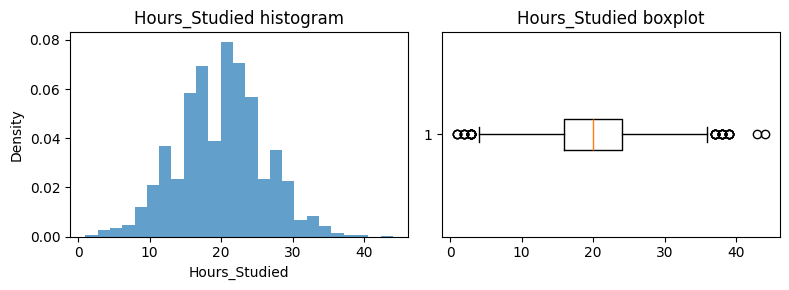

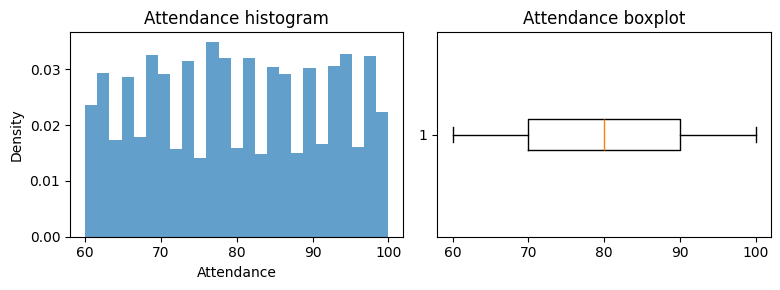

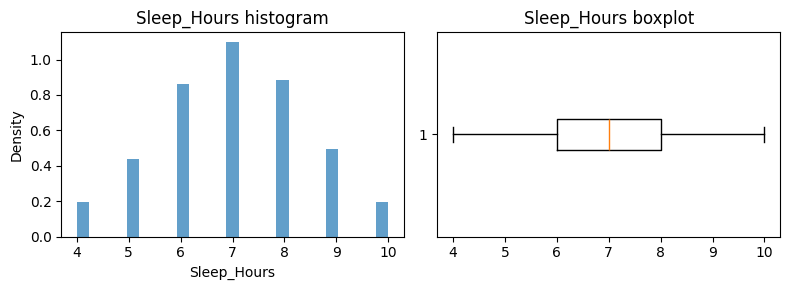

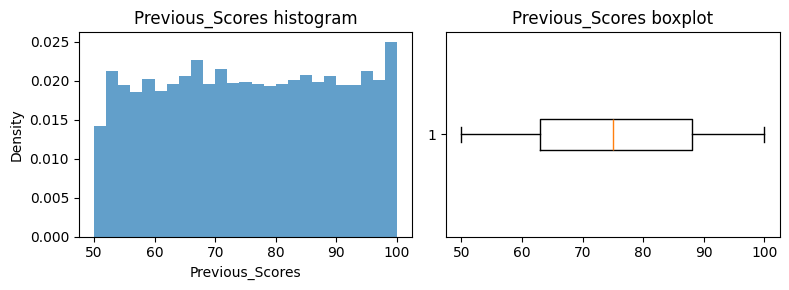

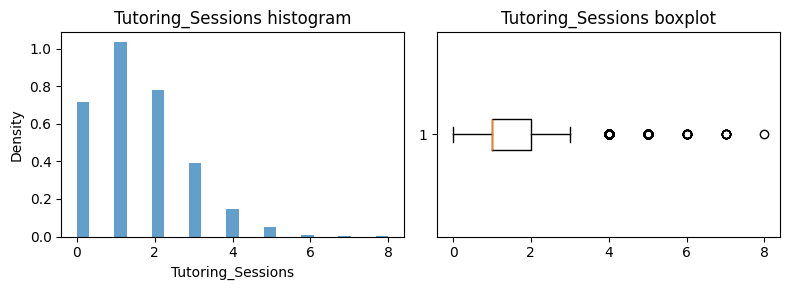

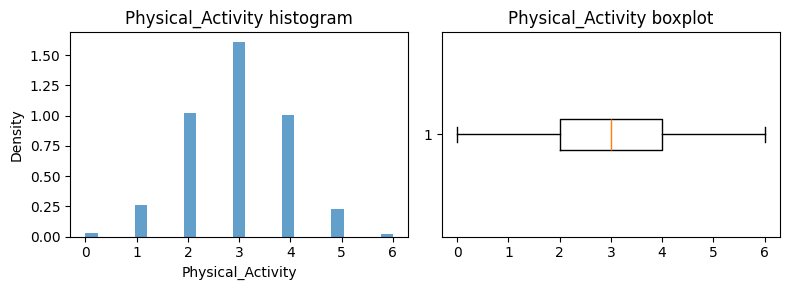

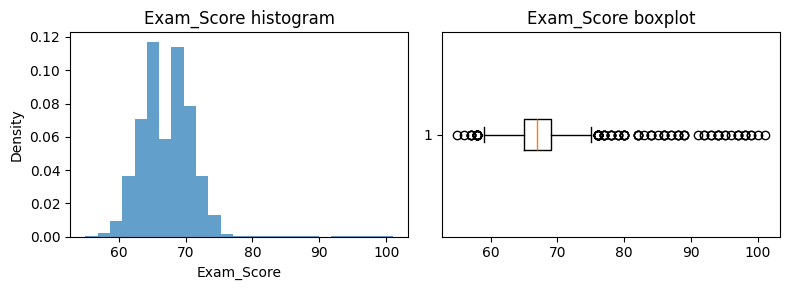


Numeric summary (first rows):
                      n   mean  median    std    min     max   skew  excess_kurtosis    p10    p25    p75    p90
feature                                                                                                         
Hours_Studied      6378 19.977  20.000  5.985  1.000  44.000  0.016            0.007 12.000 16.000 24.000 28.000
Attendance         6378 80.021  80.000 11.551 60.000 100.000  0.006           -1.196 64.000 70.000 90.000 96.000
Sleep_Hours        6378  7.035   7.000  1.468  4.000  10.000 -0.027           -0.504  5.000  6.000  8.000  9.000
Previous_Scores    6378 75.066  75.000 14.400 50.000 100.000 -0.001           -1.192 55.000 63.000 88.000 95.000
Tutoring_Sessions  6378  1.495   1.000  1.234  0.000   8.000  0.825            0.663  0.000  1.000  2.000  3.000

Simple interpretation (numeric):
- Hours_Studied: n=6378, mean=19.98, median=20.00, std=5.99; approx symmetric
- Attendance: n=6378, mean=80.02, median=80.00, std=11.55; approx 

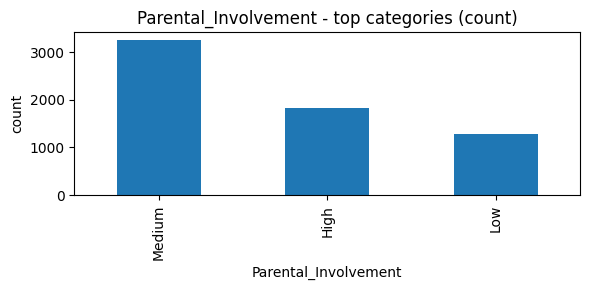

Mean Exam_Score by category (top rows):
                      count   mean  median
Parental_Involvement                      
Medium                 3251 67.113  67.000
High                   1836 68.112  68.000
Low                    1291 66.379  66.000

--- Access_to_Resources (top values) ---
Access_to_Resources
Medium    3204
High      1900
Low       1274


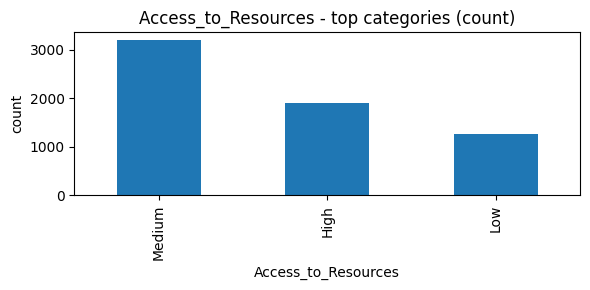

Mean Exam_Score by category (top rows):
                     count   mean  median
Access_to_Resources                      
Medium                3204 67.156  67.000
High                  1900 68.103  68.000
Low                   1274 66.224  66.000

--- Extracurricular_Activities (top values) ---
Extracurricular_Activities
Yes    3807
No     2571


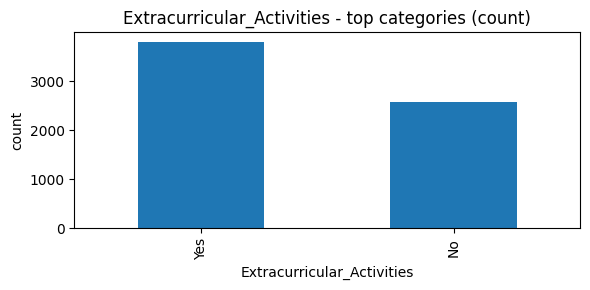

Mean Exam_Score by category (top rows):
                            count   mean  median
Extracurricular_Activities                      
Yes                          3807 67.455  67.000
No                           2571 66.952  67.000

--- Motivation_Level (top values) ---
Motivation_Level
Medium    3237
Low       1864
High      1277


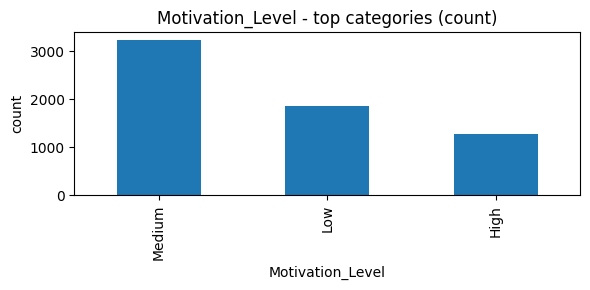

Mean Exam_Score by category (top rows):
                  count   mean  median
Motivation_Level                      
Medium             3237 67.339  67.000
Low                1864 66.764  67.000
High               1277 67.744  67.000

--- Internet_Access (top values) ---
Internet_Access
Yes    5893
No      485


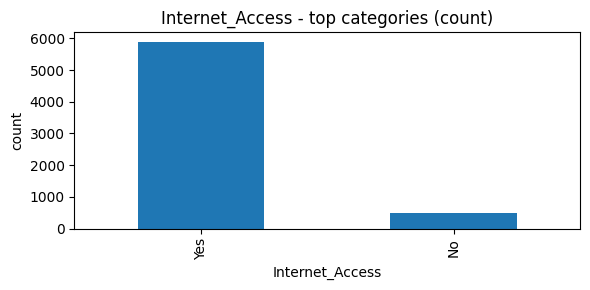

Mean Exam_Score by category (top rows):
                 count   mean  median
Internet_Access                      
Yes               5893 67.310  67.000
No                 485 66.555  66.000

--- Family_Income (top values) ---
Family_Income
Low       2582
Medium    2566
High      1230


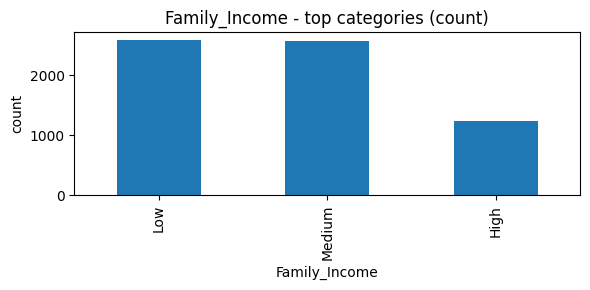

Mean Exam_Score by category (top rows):
               count   mean  median
Family_Income                      
Low             2582 66.853  67.000
Medium          2566 67.371  67.000
High            1230 67.841  68.000

--- Teacher_Quality (top values) ---
Teacher_Quality
Medium    3826
High      1905
Low        647


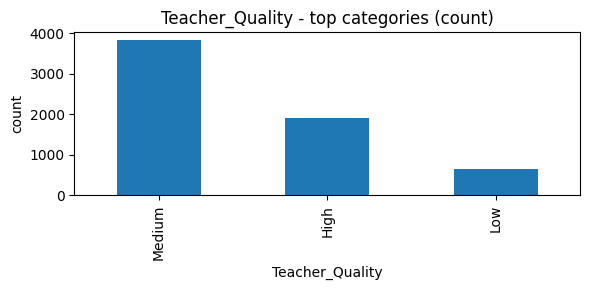

Mean Exam_Score by category (top rows):
                 count   mean  median
Teacher_Quality                      
Medium            3826 67.119  67.000
High              1905 67.682  68.000
Low                647 66.776  67.000

--- School_Type (top values) ---
School_Type
Public     4434
Private    1944


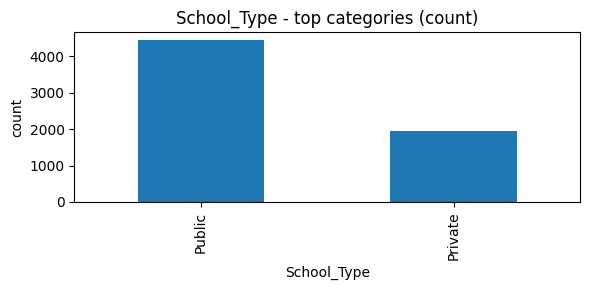

Mean Exam_Score by category (top rows):
             count   mean  median
School_Type                      
Public        4434 67.224  67.000
Private       1944 67.316  67.000

--- Peer_Influence (top values) ---
Peer_Influence
Positive    2553
Neutral     2495
Negative    1330


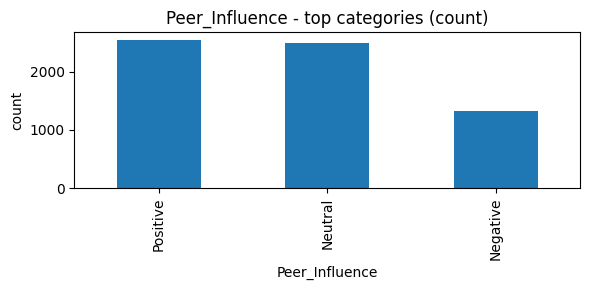

Mean Exam_Score by category (top rows):
                count   mean  median
Peer_Influence                      
Positive         2553 67.637  67.000
Neutral          2495 67.216  67.000
Negative         1330 66.583  66.000

--- Learning_Disabilities (top values) ---
Learning_Disabilities
No     5710
Yes     668


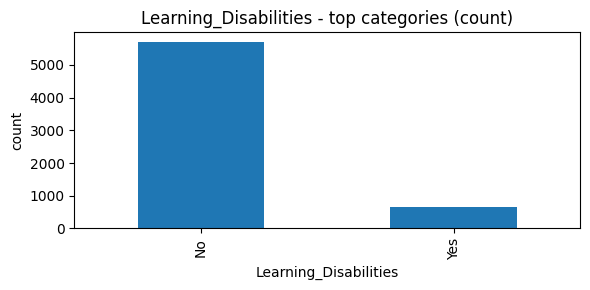

Mean Exam_Score by category (top rows):
                       count   mean  median
Learning_Disabilities                      
No                      5710 67.364  67.000
Yes                      668 66.292  66.000

--- Parental_Education_Level (top values) ---
Parental_Education_Level
High School     3159
College         1939
Postgraduate    1280


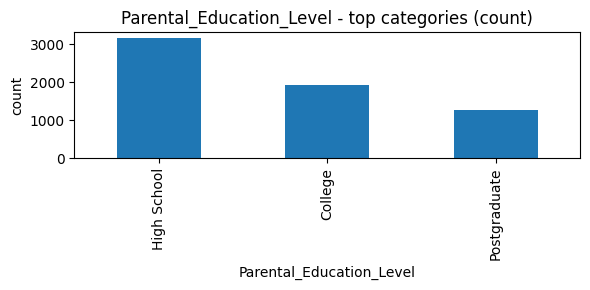

Mean Exam_Score by category (top rows):
                          count   mean  median
Parental_Education_Level                      
High School                3159 66.895  67.000
College                    1939 67.358  67.000
Postgraduate               1280 67.973  68.000

--- Distance_from_Home (top values) ---
Distance_from_Home
Near        3801
Moderate    1941
Far          636


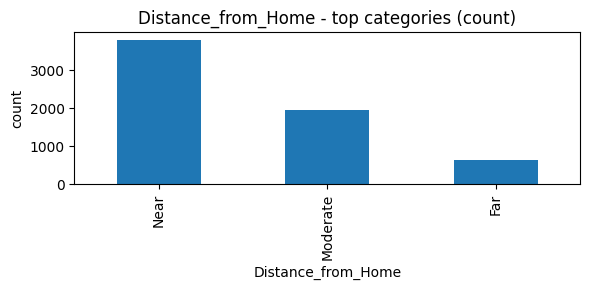

Mean Exam_Score by category (top rows):
                    count   mean  median
Distance_from_Home                      
Near                 3801 67.514  67.000
Moderate             1941 66.987  67.000
Far                   636 66.498  66.000

--- Gender (top values) ---
Gender
Male      3688
Female    2690


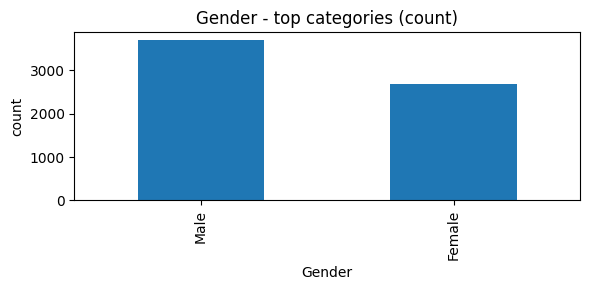

Mean Exam_Score by category (top rows):
        count   mean  median
Gender                      
Male     3688 67.236  67.000
Female   2690 67.275  67.000


Automated short conclusions:


In [134]:


df['Exam_Score'] = pd.to_numeric(df['Exam_Score'], errors='coerce')

# разделим переменные по типу шкалы
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in numeric_cols]

print("Numeric variables:", numeric_cols)
print("Categorical variables:", cat_cols)
print()

# --- 2. Анализ числовых (ratio/interval) ---
# Для каждой числовой переменной: частотное описание, меры центральной тенденции, дисперсии, перцентили, skew/kurtosis
num_summary = []
for col in numeric_cols:
    x = pd.to_numeric(df[col], errors='coerce').dropna()
    if x.empty:
        continue
    desc = x.describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])
    skew = float(x.skew())
    kurt = float(x.kurtosis())  # excess kurtosis (Fisher)
    num_summary.append({
        'feature': col,
        'n': int(desc['count']),
        'mean': float(desc['mean']),
        'median': float(desc['50%']),
        'std': float(desc['std']),
        'min': float(desc['min']),
        'max': float(desc['max']),
        'skew': round(skew,3),
        'excess_kurtosis': round(kurt,3),
        'p10': float(desc['10%']),
        'p25': float(desc['25%']),
        'p75': float(desc['75%']),
        'p90': float(desc['90%'])
    })

    # Графики: гистограмма и boxplot (простые)
    plt.figure(figsize=(8,3))
    plt.subplot(1,2,1)
    plt.hist(x, bins=25, density=True, alpha=0.7)
    plt.title(f'{col} histogram')
    plt.xlabel(col); plt.ylabel('Density')
    plt.subplot(1,2,2)
    plt.boxplot(x, vert=False)
    plt.title(f'{col} boxplot')
    plt.tight_layout()
    plt.show()

# Сохраним и напечатаем краткую таблицу по числовым
num_df = pd.DataFrame(num_summary).set_index('feature')
print("\nNumeric summary (first rows):")
print(num_df.head().to_string())

# Простая интерпретация числовых: симметрия/асимметрия
print("\nSimple interpretation (numeric):")
for feat, row in num_df.iterrows():
    skew = row['skew']
    asym = 'approx symmetric' if abs(skew) < 0.5 else ('right-skewed' if skew > 0 else 'left-skewed')
    print(f"- {feat}: n={int(row['n'])}, mean={row['mean']:.2f}, median={row['median']:.2f}, std={row['std']:.2f}; {asym}")

# --- 3. Анализ категориальных (nominal/ordinal) ---
# Частоты и графики; pivot mean Exam_Score by category если есть Exam_Score
print("\nCategorical summaries and (if available) Exam_Score means by category:\n")
for col in cat_cols:
    s = df[col].astype(str).fillna('NA').str.strip()
    vc = s.value_counts(dropna=False)
    print(f"--- {col} (top values) ---")
    print(vc.head(10).to_string())
    # bar plot (top 10)
    vc_head = vc.head(10)
    plt.figure(figsize=(6,3))
    vc_head.plot(kind='bar')
    plt.title(f'{col} - top categories (count)')
    plt.ylabel('count')
    plt.tight_layout()
    plt.show()

    # pivot: mean Exam_Score per category (если есть Exam_Score)
    if 'Exam_Score' in df.columns:
        pivot = df[[col, 'Exam_Score']].dropna().groupby(col)['Exam_Score'].agg(['count','mean','median']).sort_values('count', ascending=False)
        print("Mean Exam_Score by category (top rows):")
        print(pivot.head(8).to_string())
        # сохранить небольшой pivot
    
    print()

# --- 4. Общее заключение (авто) ---
print("\nAutomated short conclusions:")
# наиболее сильные корреляции с Exam_Score (если Exam_Score есть)

# приведение категорий к кодам простым factorize и вычисление корреляций
# df_for_corr = df.copy()
# for c in cat_cols:
#     df_for_corr[c] = pd.factorize(df_for_corr[c].astype(str))[0]
#     corr = df_for_corr.corr()['Exam_Score'].drop('Exam_Score').abs().sort_values(ascending=False)
#     print("Top features by absolute Pearson correlation with Exam_Score:")
#     print(corr.head(10).to_string())


3. Please answer the questions (you may have already answered some of them in the previous section):
- What percentage of students are highly motivated?
- What is the ratio of students with different levels of parental involvement in their education by family income level?
- Is there a relationship between the number of sleep hours and class attendance (at this stage, we study the relationships based on descriptive data analysis)?
- How do grades differ for boys and girls living at different distances from school?
- What are the specific characteristics of distribution of final exam grades?
- Is there a relationship between the level of students' motivation and the quality of teaching?
- What are the characteristics of excellent students (please define and describe which students should be classified as excellent)?
- Which factors are positively correlated with exam results (at this stage, we study the relationships based on descriptive data analysis)?
- Which variables have a distribution close to normal, explain your answer?
- Which metric variables have an asymmetry in the distribution of their values?

In [135]:
# you can write code here


# What percentage of students are highly motivated?
mot_series = df['Motivation_Level'].dropna().astype(str).str.strip()
total = len(mot_series)
high_count = (mot_series.str.lower() == 'high').sum()
percentage_high = (high_count / total) * 100 if total > 0 else float('nan')

print(f"Highly motivated students: {high_count} / {total} ({percentage_high:.2f}%)")


Highly motivated students: 1277 / 6378 (20.02%)


Counts of Parental Involvement by Family Income (count (percentage within income)):
Parental_Involvement           Low         Medium          High
Family_Income                                                  
Low                   553 (21.42%)  1283 (49.69%)  746 (28.89%)
Medium                497 (19.37%)  1332 (51.91%)  737 (28.72%)
High                  241 (19.59%)   636 (51.71%)  353 (28.70%)

Percentage distribution of Parental Involvement within each Family Income level (%):
Parental_Involvement    Low  Medium   High
Family_Income                             
Low                  21.420  49.690 28.890
Medium               19.370  51.910 28.720
High                 19.590  51.710 28.700


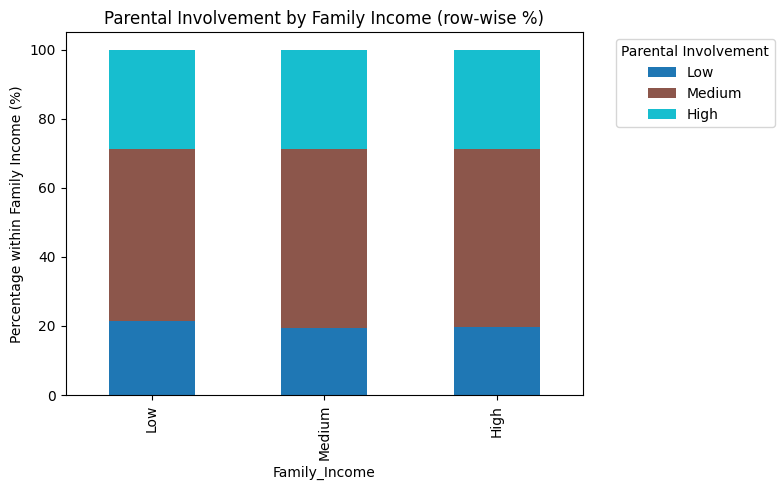

In [136]:
# What is the ratio of students with different levels of parental involvement in their education by family income level?

income_order = ['Low', 'Medium', 'High']
parental_involvement_order = ['Low', 'Medium', 'High']

# counts table
counts = pd.crosstab(df['Family_Income'], df['Parental_Involvement']).reindex(index=income_order, columns=parental_involvement_order).fillna(0).astype(int)

# row-wise percentages (ratio within each family income level)
percentages = pd.crosstab(df['Family_Income'], df['Parental_Involvement'], normalize='index').reindex(index=income_order, columns=parental_involvement_order).fillna(0) * 100
percentages = percentages.round(2)

# display counts with percentage in parentheses next to each count
formatted_counts = counts.copy().astype(str)
for col in counts.columns:
    formatted_counts[col] = counts[col].astype(str) + " (" + percentages[col].apply(lambda x: f"{x:.2f}%") + ")"

print("Counts of Parental Involvement by Family Income (count (percentage within income)):")
print(formatted_counts)
print("\nPercentage distribution of Parental Involvement within each Family Income level (%):")
print(percentages)

# stacked bar chart (percentage)
ax = percentages.plot(kind='bar', stacked=True, figsize=(8,5), colormap='tab10')
ax.set_ylabel('Percentage within Family Income (%)')
ax.set_title('Parental Involvement by Family Income (row-wise %)')
ax.legend(title='Parental Involvement', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

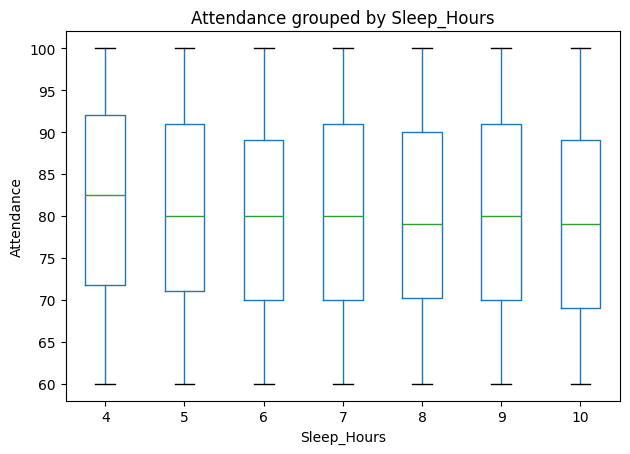

In [137]:
# Is there a relationship between the number of sleep hours and class attendance (at this stage, we study the relationships based on descriptive data analysis)?


group_col = "Sleep_Hours"
value_col = "Attendance"
# приведение к числу и удаление пустых
df[value_col] = pd.to_numeric(df[value_col], errors="coerce")
df_plot = df[[group_col, value_col]].dropna()

# один график: по одному боксплоту на категорию Sleep_Hours
plt.figure(figsize=(10, 6))
df_plot.boxplot(column=value_col, by=group_col, grid=False)
plt.suptitle("")              # убрать автоматический заголовок
plt.title(f"{value_col} grouped by {group_col}")
plt.xlabel(group_col)
plt.ylabel(value_col)
plt.tight_layout()
plt.show()


In [138]:
# How do grades differ for boys and girls living at different distances from school?

mapping = {"Near": 0, "Moderate": 1, "Far": 2}
df["dist_code"] = df["Distance_from_Home"].map(mapping)

# оценки (Previous_Scores) -> число
df["grade"] = pd.to_numeric(df["Previous_Scores"], errors="coerce")

# оставить только валидные строки
df2 = df.dropna(subset=["Gender", "dist_code", "grade"])


# средние оценки для наглядности
print(df2.groupby(["Gender", "Distance_from_Home"])["grade"].mean().unstack())

Distance_from_Home    Far  Moderate   Near
Gender                                    
Female             75.710    74.843 75.073
Male               74.602    74.724 75.318


<Figure size 800x500 with 0 Axes>

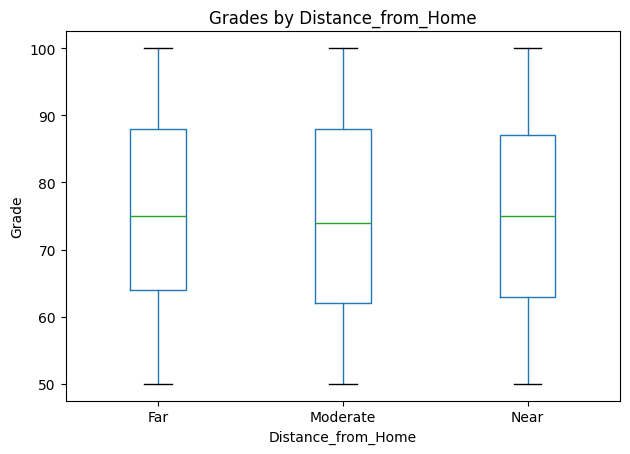

In [139]:
df["grade"] = pd.to_numeric(df["Previous_Scores"], errors="coerce")
df2 = df[["Distance_from_Home", "grade"]].dropna()

plt.figure(figsize=(8,5))
df2.boxplot(column="grade", by="Distance_from_Home", grid=False)
plt.suptitle("")
plt.title("Grades by Distance_from_Home")
plt.xlabel("Distance_from_Home")
plt.ylabel("Grade")
plt.tight_layout()
plt.show()

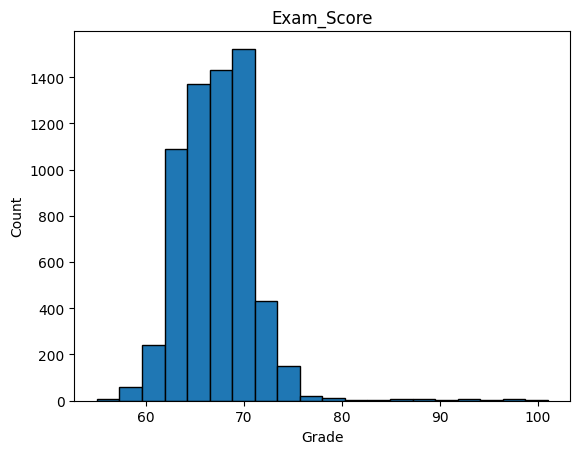

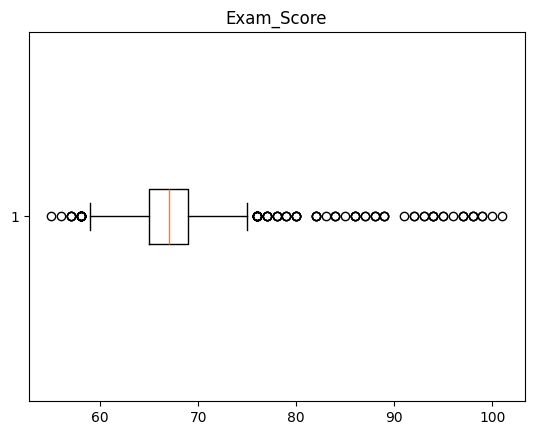

In [140]:
col = "Exam_Score" if "Exam_Score" in df.columns else df.select_dtypes("number").columns[0]
grades = pd.to_numeric(df[col], errors="coerce").dropna()

plt.hist(grades, bins=20, edgecolor="k")
plt.title(col); plt.xlabel("Grade"); plt.ylabel("Count")
plt.show()

plt.boxplot(grades, vert=False)
plt.title(col)
plt.show()

In [141]:
motiv_col = 'Motivation_Level'
teach_col = 'Teacher_Quality'


df2 = df[[motiv_col, teach_col]]
df2.dropna()


order = ['Low', 'Medium', 'High']

# преобразуем в упорядоченные категории и возьмём коды (0,1,2)
df2[motiv_col] = pd.Categorical(df2[motiv_col], categories=order, ordered=True).codes
df2[teach_col] = pd.Categorical(df2[teach_col], categories=order, ordered=True).codes

x = df2[motiv_col]
y = df2[teach_col]

pr, pp = stats.pearsonr(x, y)
print(f'Pearson r = {pr:.4f}, p = {pp:.4g}')


Pearson r = -0.0128, p = 0.3055


/tmp/ipykernel_295982/4278147672.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[motiv_col] = pd.Categorical(df2[motiv_col], categories=order, ordered=True).codes
/tmp/ipykernel_295982/4278147672.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[teach_col] = pd.Categorical(df2[teach_col], categories=order, ordered=True).codes


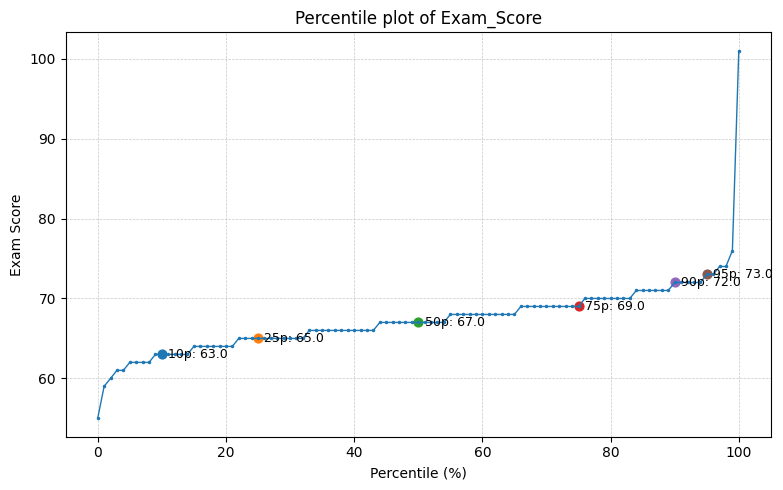

In [142]:
scores = pd.to_numeric(df['Exam_Score'], errors='coerce').dropna().values

# percentiles 0..100
p = np.arange(0, 101)
vals = np.percentile(scores, p)

# ключевые перцентили для подписи
keys = [10, 25, 50, 75, 90, 95]

# простая отрисовка
plt.figure(figsize=(8,5))
plt.plot(p, vals, marker='.', markersize=3, linewidth=1)
for q in keys:
    v = np.percentile(scores, q)
    plt.scatter(q, v, s=40)
    plt.text(q + 1, v, f'{q}p: {v:.1f}', va='center', fontsize=9)

plt.xlabel('Percentile (%)')
plt.ylabel('Exam Score')
plt.title('Percentile plot of Exam_Score')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

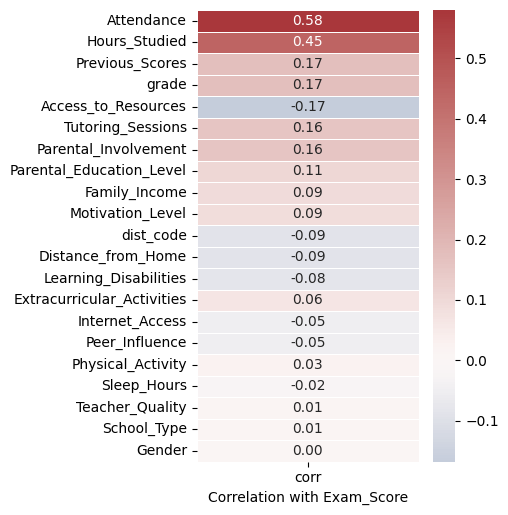

In [143]:
df['Exam_Score'] = pd.to_numeric(df['Exam_Score'], errors='coerce')
df = df[df['Exam_Score'].notna()].copy()

# преобразуем нечисловые колонки в коды (factorize), числовые оставим
def to_codes(col):
    if pd.api.types.is_numeric_dtype(col):
        return pd.to_numeric(col, errors='coerce')
    return pd.factorize(col.fillna('NA'))[0]

data = df.apply(to_codes)

# корреляции с Exam_Score
corr_with_exam = data.corrwith(data['Exam_Score']).drop('Exam_Score', errors='ignore')

# упорядочим по абсолютной величине корреляции
order = corr_with_exam.abs().sort_values(ascending=False).index
corr_df = corr_with_exam.loc[order].to_frame(name='corr')

# нарисуем heatmap (каждая строка = признак, столбец = корреляция с Exam_Score)
plt.figure(figsize=(5, max(4, 0.25 * len(corr_df))))
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap='vlag', center=0, cbar=True, linewidths=0.5)
plt.xlabel('Correlation with Exam_Score')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [144]:

num = df.select_dtypes(include=[np.number])
rows = []
for col in num.columns:
    x = num[col].dropna()
    if len(x) < 8:
        rows.append((col, len(x), np.nan, np.nan, np.nan, False)); continue
    skew = x.skew()
    ex_kurt = x.kurtosis()  # excess kurtosis (Fisher)
    stat, p = stats.normaltest(x)  # D'Agostino
    approx_normal = (abs(skew) < 0.5) and (abs(ex_kurt) < 1.0) and (p > 0.05)
    rows.append((col, len(x), round(skew,3), round(ex_kurt,3), round(p,4), approx_normal))

res = pd.DataFrame(rows, columns=['feature','n','skew','excess_kurtosis','normaltest_p','approx_normal'])
print(res)

             feature     n   skew  excess_kurtosis  normaltest_p  \
0      Hours_Studied  6378  0.016            0.007         0.861   
1         Attendance  6378  0.006           -1.196         0.000   
2        Sleep_Hours  6378 -0.027           -0.504         0.000   
3    Previous_Scores  6378 -0.001           -1.192         0.000   
4  Tutoring_Sessions  6378  0.825            0.663         0.000   
5  Physical_Activity  6378 -0.037           -0.054         0.330   
6         Exam_Score  6378  1.666           10.656         0.000   
7          dist_code  6378  0.979           -0.243         0.000   
8              grade  6378 -0.001           -1.192         0.000   

   approx_normal  
0           True  
1          False  
2          False  
3          False  
4          False  
5           True  
6          False  
7          False  
8          False  


Hours_Studied: n=6378, skew=0.016, kurt(ex)=0.006, normaltest_p=0.8610816020257488


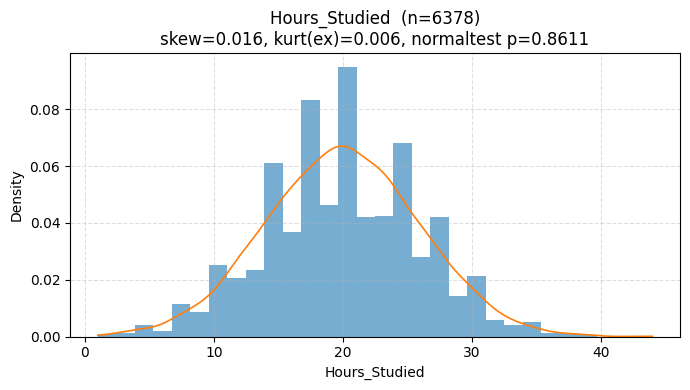

Attendance: n=6378, skew=0.006, kurt(ex)=-1.196, normaltest_p=0.0


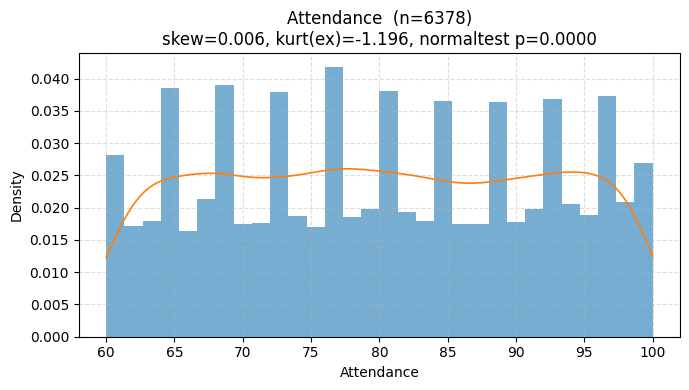

Sleep_Hours: n=6378, skew=-0.027, kurt(ex)=-0.504, normaltest_p=7.043173539635112e-28


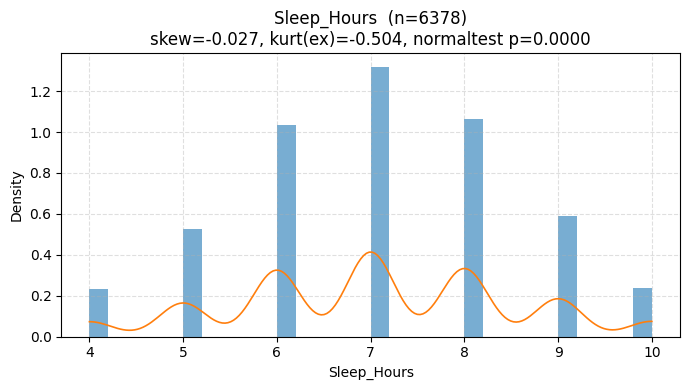

Previous_Scores: n=6378, skew=-0.001, kurt(ex)=-1.192, normaltest_p=0.0


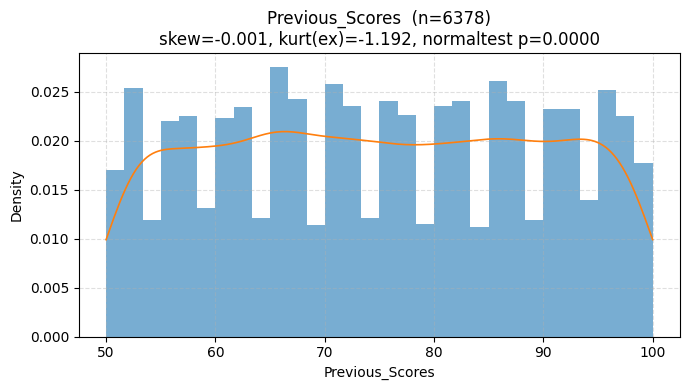

Tutoring_Sessions: n=6378, skew=0.825, kurt(ex)=0.662, normaltest_p=1.7279746271640007e-137


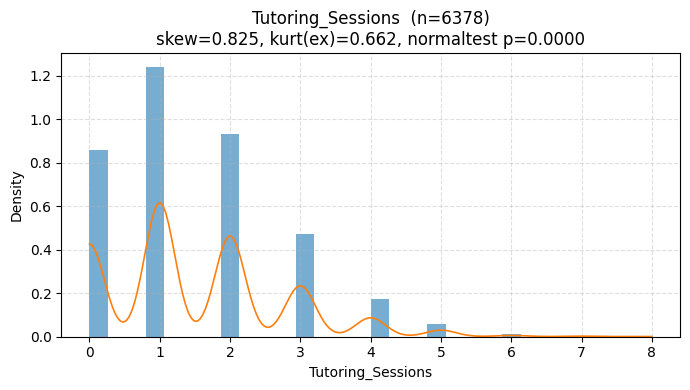

Physical_Activity: n=6378, skew=-0.037, kurt(ex)=-0.054, normaltest_p=0.33028308540230733


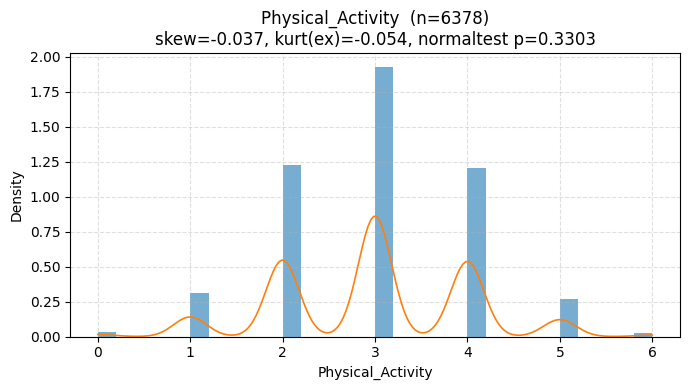

Exam_Score: n=6378, skew=1.665, kurt(ex)=10.647, normaltest_p=0.0


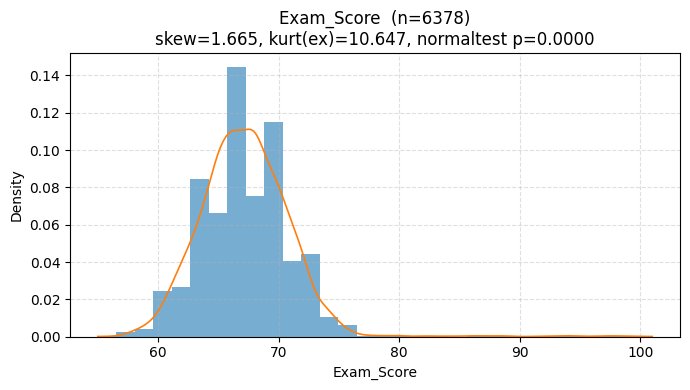

dist_code: n=6378, skew=0.979, kurt(ex)=-0.244, normaltest_p=2.416454319525013e-164


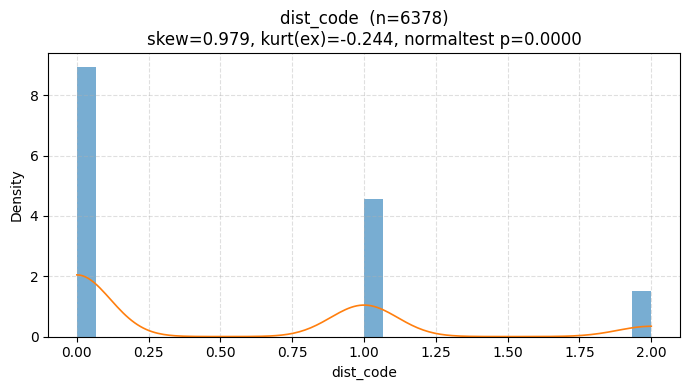

grade: n=6378, skew=-0.001, kurt(ex)=-1.192, normaltest_p=0.0


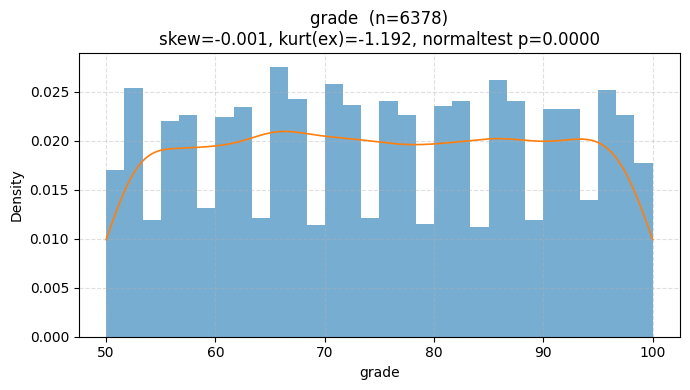

In [145]:

num = df.select_dtypes(include=[np.number])

for col in num.columns:
    x = pd.to_numeric(num[col], errors='coerce').dropna().values
    if x.size == 0:
        continue

    # статистики
    skew = stats.skew(x)
    kurt_ex = stats.kurtosis(x)            # excess kurtosis (Fisher)
    p_norm = np.nan
    if x.size >= 8:
        _, p_norm = stats.normaltest(x)

    # печать краткой информации
    print(f"{col}: n={x.size}, skew={skew:.3f}, kurt(ex)={kurt_ex:.3f}, normaltest_p={p_norm if not np.isnan(p_norm) else 'NA'}")

    # график: гистограмма + KDE
    plt.figure(figsize=(7,4))
    plt.hist(x, bins=30, density=True, alpha=0.6)
    try:
        kde = stats.gaussian_kde(x)
        xs = np.linspace(x.min(), x.max(), 200)
        plt.plot(xs, kde(xs), linewidth=1.2)
    except Exception:
        pass

    title = f"{col}  (n={x.size})\nskew={skew:.3f}, kurt(ex)={kurt_ex:.3f}"
    if not np.isnan(p_norm):
        title += f", normaltest p={p_norm:.4f}"
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.grid(alpha=0.4, linestyle='--')
    plt.tight_layout()
    plt.show()

In [146]:

# select metric (numeric) columns
num = df.select_dtypes(include=[np.number]).copy()

# compute skewness and non-null counts
skew_vals = num.apply(lambda s: s.dropna().skew())
counts = num.count()

res = pd.DataFrame({
    'skew': skew_vals,
    'n': counts
}).dropna(subset=['skew'])  # drop columns with no numeric data

# classification thresholds (you can change these)
MILD = 0.5    # |skew| > 0.5 considered asymmetric (moderate)
HIGH = 1.0    # |skew| > 1.0 considered strongly skewed

def classify(sk):
    if np.isnan(sk):
        return 'no_data'
    if abs(sk) <= MILD:
        return 'approx_symmetric'
    if sk > HIGH:
        return 'high_right_skew'
    if sk > MILD:
        return 'moderate_right_skew'
    if sk < -HIGH:
        return 'high_left_skew'
    if sk < -MILD:
        return 'moderate_left_skew'
    return 'unknown'

res['skew_class'] = res['skew'].apply(classify)

# sort by absolute skew
res = res.assign(abs_skew=res['skew'].abs()).sort_values('abs_skew', ascending=False).drop(columns='abs_skew')

# print summary table
pd.set_option('display.float_format', '{:.3f}'.format)
print("Skewness summary for numeric (metric) variables:\n")
print(res.to_string())

# lists of asymmetric variables
right = res[res['skew'] > MILD].index.tolist()
left = res[res['skew'] < -MILD].index.tolist()

print("\nVariables with right (positive) skew (skew > {:.2f}):".format(MILD), right)
print("Variables with left (negative) skew (skew < -{:.2f}):".format(MILD), left)


Skewness summary for numeric (metric) variables:

                    skew     n           skew_class
Exam_Score         1.666  6378      high_right_skew
dist_code          0.979  6378  moderate_right_skew
Tutoring_Sessions  0.825  6378  moderate_right_skew
Physical_Activity -0.037  6378     approx_symmetric
Sleep_Hours       -0.027  6378     approx_symmetric
Hours_Studied      0.016  6378     approx_symmetric
Attendance         0.006  6378     approx_symmetric
Previous_Scores   -0.001  6378     approx_symmetric
grade             -0.001  6378     approx_symmetric

Variables with right (positive) skew (skew > 0.50): ['Exam_Score', 'dist_code', 'Tutoring_Sessions']
Variables with left (negative) skew (skew < -0.50): []


Comments on the task and principles of its assessment:

- All points of the task must be accompanied by _executed_ code fragments.
- All results of the code execution (statistics, graphs, tables) should be commented, conclusions in the written form should be made based on them.
- If you have completed this task, you will receive 8 points (excellent grade). To get a higher grade (9 or 10), you need to go beyond the proposed task. For example, use additional descriptive data analysis methods and instruments, which were not discussed in the class.
- This task consists of three parts. The first weighs 10%, the second - 40%, the third - 50%.
- The task can be completed individually or in a group of 2 students, the assessment criteria will be the same.
- If the task is completed by 2 students, then only one of the students should upload the work to SmartLMS.
- The name of the file uploaded to SmartLMS should include the last name(s) of the author(s) of the work.
- If you use AI in the work, you must indicate where and how exactly it was used.

### Please upload the Jupyter Notebook with comments and answers in SmartLMS. The deadline is 10 September 23:55. 